In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
from skimage import measure, morphology
import pydicom as dicom
import numpy as np
import cv2
import skimage.transform

#data path 수정
os.chdir("C:\\Users\\User\\Desktop\\G팔로미1\\G-팔로미 data")
os.getcwd()

'C:\\Users\\User\\Desktop\\G팔로미1\\G-팔로미 data'

In [4]:
calc=np.load('calc_data_X.npy')
mass=np.load('mass_data_X.npy')

print(len(calc),len(mass))

1071 1212


In [2]:
calc_y=np.load('calc_data_y.npy')
mass_y=np.load('mass_data_y.npy')

print(len(calc_y), len(mass_y))

1071 1212


In [66]:
mass_y_count=np.unique(mass_y,return_counts=True)
calc_y_count=np.unique(calc_y,return_counts=True)
data_y_count=np.unique(data_y,return_counts=True)

data_y_count

(array(['calc_BENIGN', 'calc_MALIGANT', 'mass_BENIGN', 'mass_MALIGANT'],
       dtype='<U13'),
 array([528, 543, 564, 648], dtype=int64))

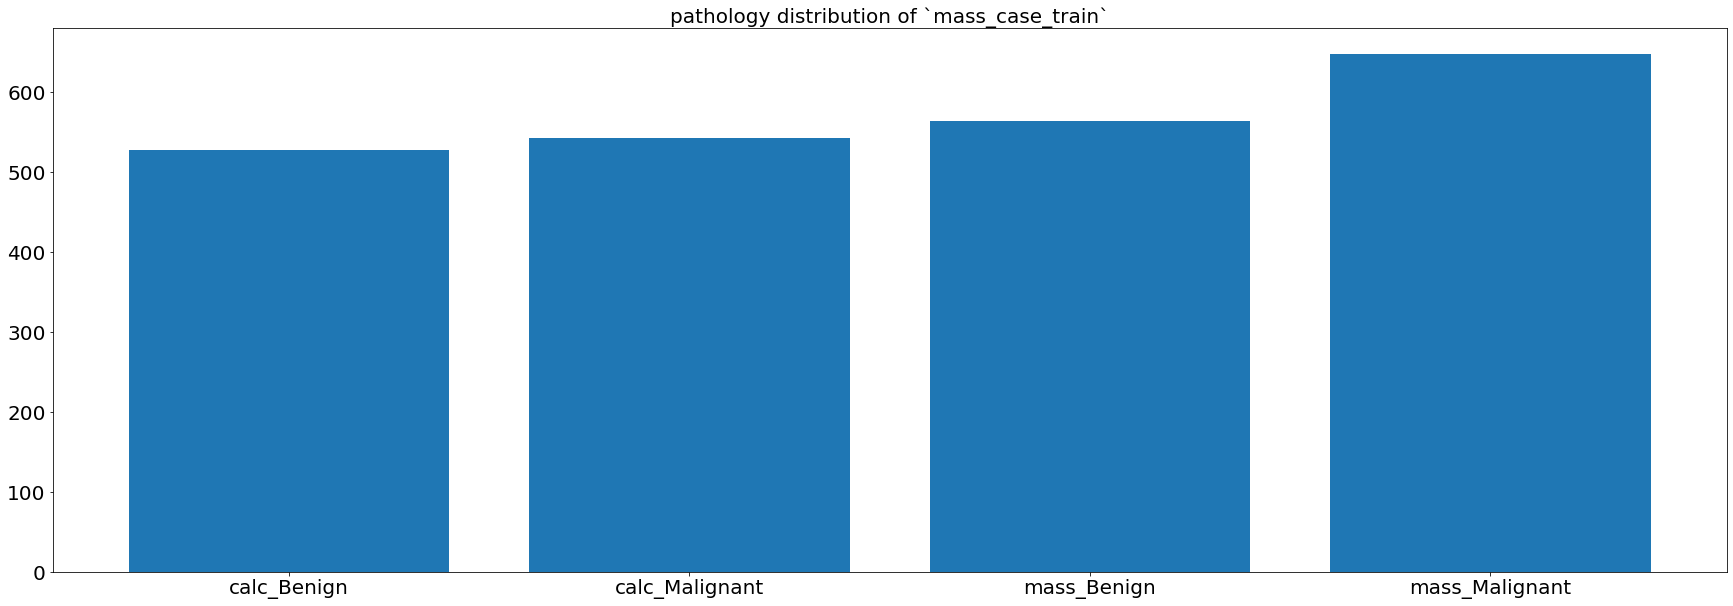

In [68]:
import matplotlib
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt

SMALL_SIZE = 17
MEDIUM_SIZE = 20
BIGGER_SIZE = 25
matplotlib.rc('font', **font)
params = {'legend.fontsize': SMALL_SIZE,
         'axes.labelsize': MEDIUM_SIZE,
         'axes.titlesize':BIGGER_SIZE,
         'xtick.labelsize':MEDIUM_SIZE,
         'ytick.labelsize':MEDIUM_SIZE}

label = 'calc_Benign','calc_Malignant','mass_Benign','mass_Malignant'


# Basic Bar Chart
plt.figure(figsize=(30,10))
plt.bar(data_y_count[0], data_y_count[1])
plt.title('pathology distribution of `mass_case_train`', fontsize=20)
plt.xticks(data_y_count[0], label, fontsize=20)
plt.show()

In [11]:
# # Load Dataframe from .csv
# calc_train = pd.read_csv(("calc_case_description_train_set.csv"), index_col=0)
# calc_test = pd.read_csv(("calc_case_description_test_set.csv"), index_col=0)
# mass_train = pd.read_csv(("mass_case_description_train_set.csv"), index_col=0)
# mass_test = pd.read_csv(("mass_case_description_test_set.csv"), index_col=0)

# calc_y=calc_train['pathology']
# calc_y=calc_y[1:]
# calc_y[calc_y == 'calc_BENIGN_WITHOUT_CALLBACK'] = "calc_BENIGN"

# mass_y=np.load('mass_train_label.npy')
# mass_y[mass_y == 'mass_CALLBACK'] = "mass_BENIGN"

# print(len(calc_y),len(mass_y))

1545 1316


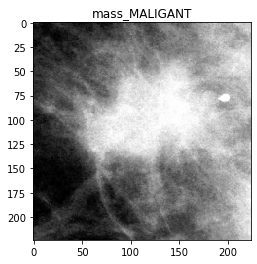

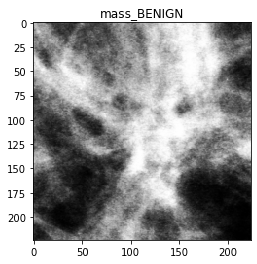

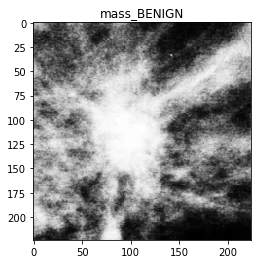

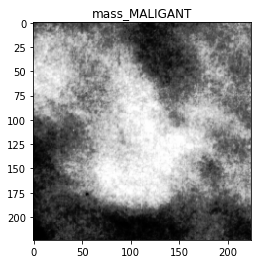

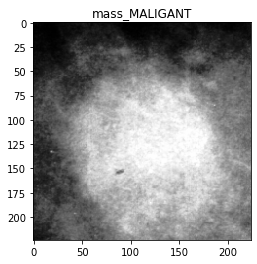

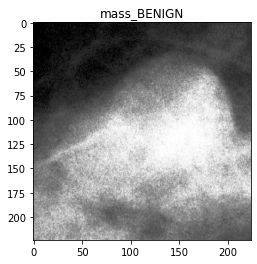

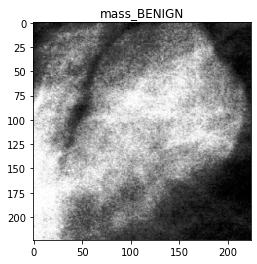

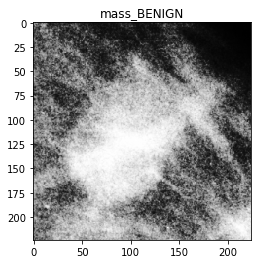

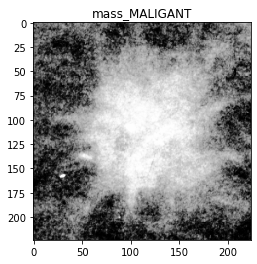

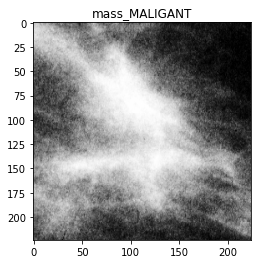

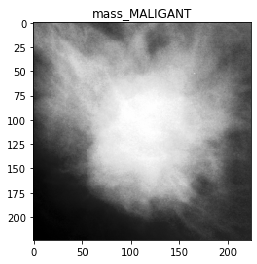

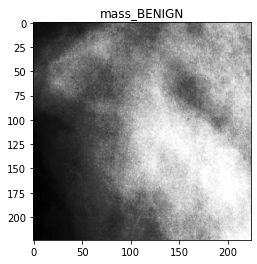

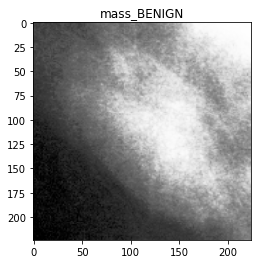

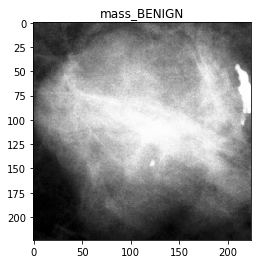

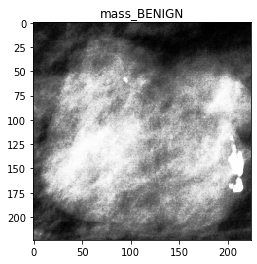

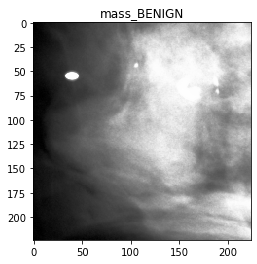

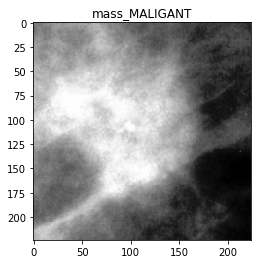

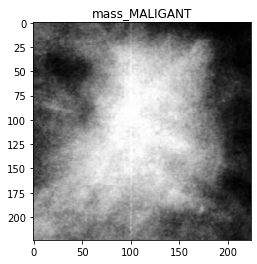

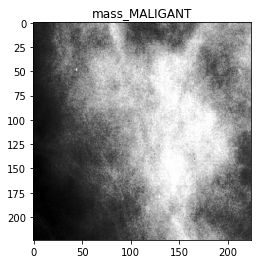

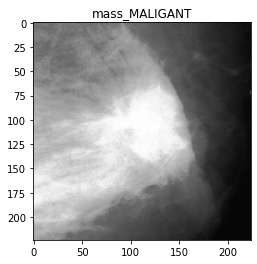

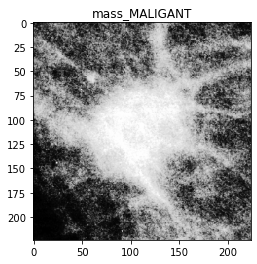

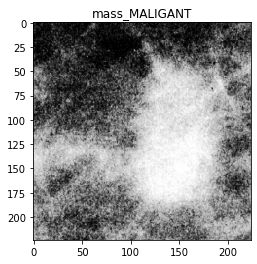

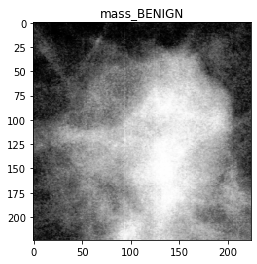

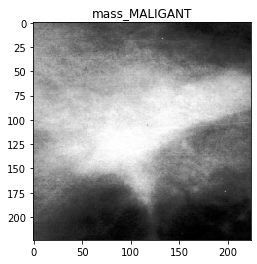

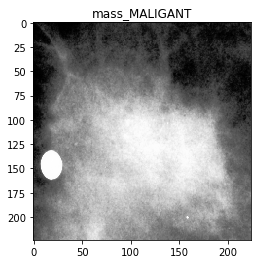

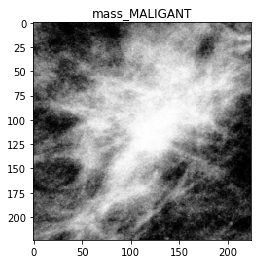

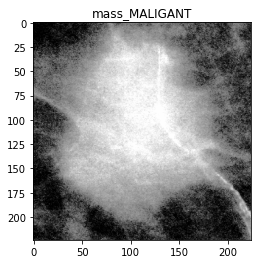

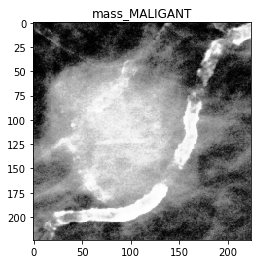

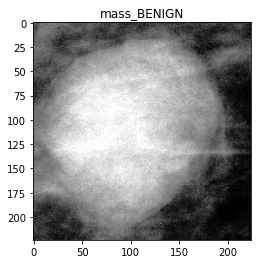

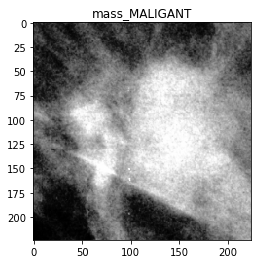

In [17]:
for i in range(30):
    plt.imshow(mass[i])
    plt.title(mass_y[i])
    plt.show()

In [61]:
data=np.concatenate((calc,mass))
data_y=np.concatenate((calc_y,mass_y))

In [19]:
len(data)

2283

In [62]:
data_y.shape

(2283,)

In [21]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

encoder = LabelEncoder()
encoder.fit(data_y)
encoded_Y = encoder.transform(data_y)
one_hot_y = np_utils.to_categorical(encoded_Y)

data_y=one_hot_y #calc_BENIGN, calc_MALIGNANT, mass_BENIGN, mass_MALIGNANT순

Using TensorFlow backend.


In [22]:
data_y.shape #calc_BENIGN, calc_MALIGNANT, mass_BENIGN, mass_MALIGNANT

(2283, 4)

In [23]:
np.save('data_X.npy',data)
np.save('data_y.npy',data_y)

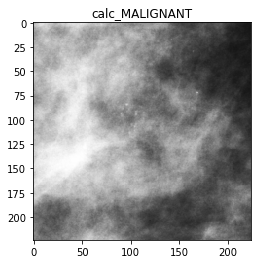

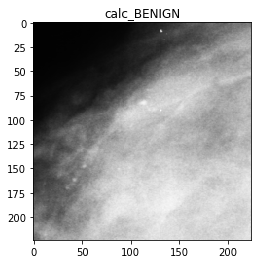

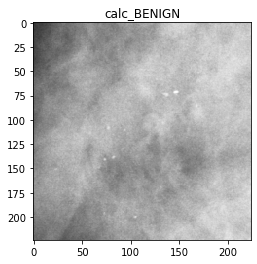

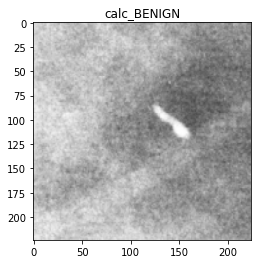

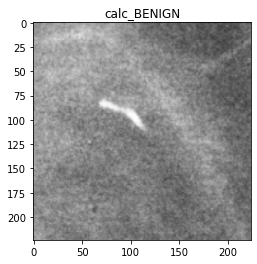

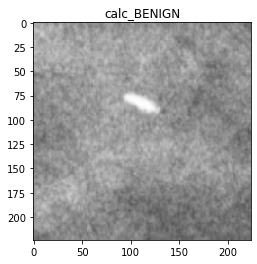

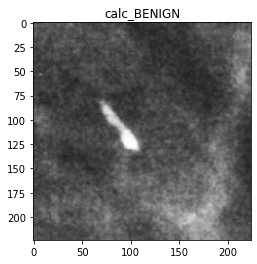

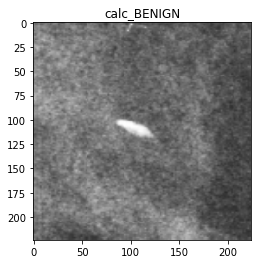

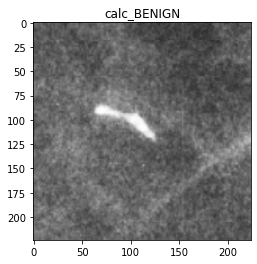

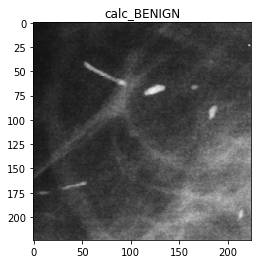

In [54]:
for i in range(10):
    plt.imshow(data[i])
    plt.title(data_y[i])
    plt.show()

In [69]:
#len(data)
len(data_y)

2283